# Uber Case Study 

The analysis is divided into three main parts:
1. Data Loading
2. Data cleaning (cleaning missing values, removing redundant columns etc.)
3. Exploratory Data Analysis 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [2]:
df = pd.read_csv("Uber_Request_Data.csv")
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [3]:
# Looking at all the column names
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

## Data Cleaning 

The data provided had various consistency issues and discrepancies. Some of
these are enumerated below:   


• The timestamp's are given, and they aren’t of standard date-time format.

• There are NA values which were treated as a part of our assumptions. 

In [4]:
# make sure that number of duplicate rows are zero
sum(df.duplicated(subset = "Request id")) == 0

True

**let's look at the dimensions of the dataframe**

In [5]:
df.shape

(6745, 6)

**check for NA values in dataset**

In [6]:
print (df.isnull().sum())  
print (df.isnull().values.any())
print (df.isnull().values.sum())

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64
True
6564


**checking the % of NAs columnwise**

In [8]:
df.isnull().sum()*100/df.shape[0] 

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

**check for NA values in each columns except "Driver id" and "Drop timestamp" (Cross Verification)**

In [9]:
print (df['Request id'].isnull().values.any()) 
print (df['Request id'].isnull().values.sum())

False
0


In [10]:
print (df['Pickup point'].isnull().values.any())
print (df['Pickup point'].isnull().values.sum())

False
0


In [11]:
print (df['Status'].isnull().values.any())
print (df['Status'].isnull().values.sum())

False
0


In [12]:
print (df['Request timestamp'].isnull().values.any())
print (df['Request timestamp'].isnull().values.sum())

False
0


**convert 'Request timestamp' column to datetime oject**

In [13]:
df["Request timestamp"] = df["Request timestamp"].astype(str)
df['Request timestamp'] = df['Request timestamp'].str.replace("/", "-")
df['Request timestamp'] = pd.to_datetime(df["Request timestamp"], dayfirst=True)

In [14]:
# convert 'Drop timestamp' column to datetime oject
df["Drop timestamp"] = df["Drop timestamp"].astype(str)
df['Drop timestamp'] = df['Drop timestamp'].str.replace("/", "-")
df['Drop timestamp'] = pd.to_datetime(df["Drop timestamp"], dayfirst=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [16]:
# extract the hour from the request time
req_hour = df["Request timestamp"].dt.hour
req_hour.head()
req_hour.value_counts()
df["req_hour"] = req_hour

In [17]:
#extract the day from the request time
req_day = df["Request timestamp"].dt.day
req_day.head()
req_day.value_counts()
df["req_day"] = req_day

## Exploratory Data Analysis

**Plotting the Bar plots for required hour and required day**

In [18]:
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='Status', data=df)
    plt.show()

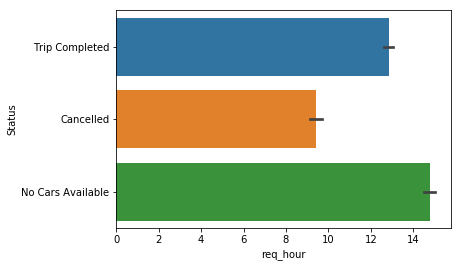

In [19]:
plot_cat("req_hour")

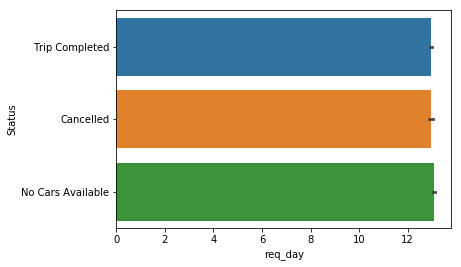

In [20]:
plot_cat("req_day")

**Taking the respective rows into the individual dataframes wrt to the Status**

In [21]:
df_completed=df.loc[df['Status']=='Trip Completed']
df_cancelled=df.loc[df['Status']=='Cancelled']
df_not_available=df.loc[df['Status']=='No Cars Available']

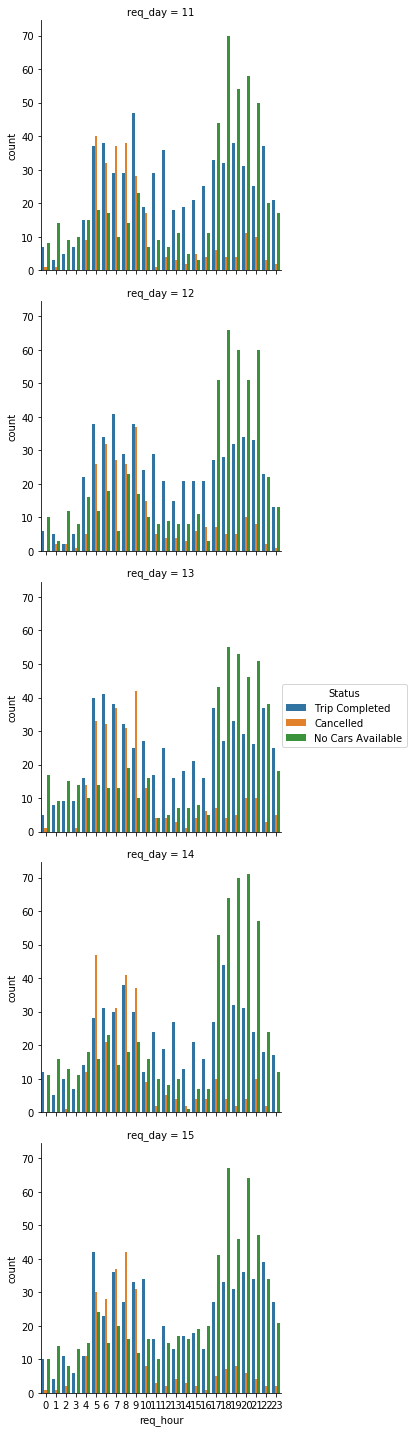

In [22]:
# factor plot of hour and day w.r.t. status
sns.factorplot(x = "req_hour", hue = "Status", row = "req_day", data = df, kind = "count")

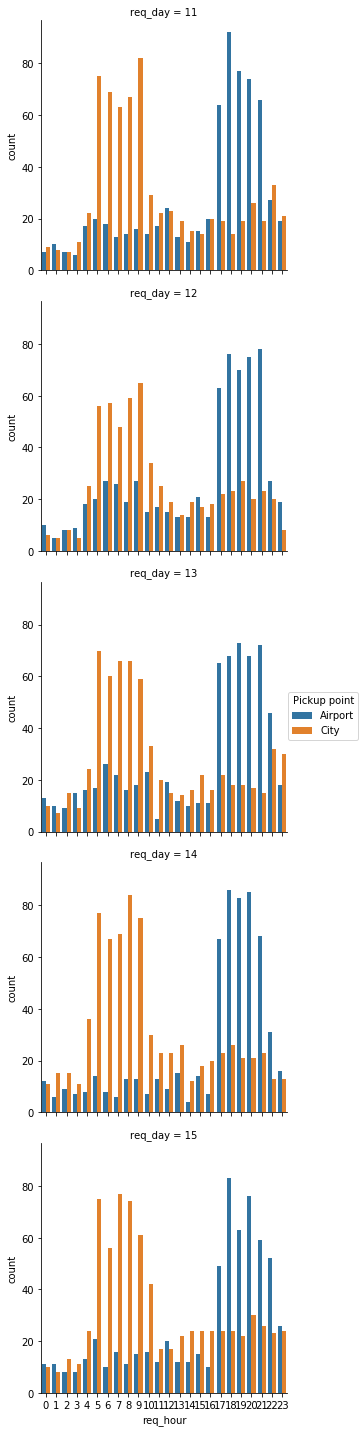

In [23]:
# factor plot of hour and day w.r.t. pickup point
sns.factorplot(x = "req_hour", hue = "Pickup point", row = "req_day", data = df, kind = "count")

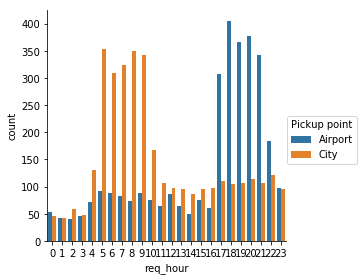

In [24]:
# aggregate count plot for all days w.r.t. to Pickup point
sns.factorplot(x = "req_hour", hue = "Pickup point", data = df, kind = "count")

In [25]:
# creating a time slot for various time period of day
def time_period(x):
    'divide the time of the day into four categories'
    if x < 5:
        return "Pre_Morning"
    elif 5 <= x < 10:
        return "Morning_Rush"
    elif 10 <= x < 17:
        return "Day_Time"
    elif 17 <= x < 22:
        return "Evening_Rush"
    else:
        return "Late_Night"

df['time_slot'] = df.req_hour.apply(lambda x: time_period(x))

In [26]:
df.time_slot.value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: time_slot, dtype: int64

In [27]:
# another way to look at the trips made in each time slot
Pre_Morning = print (df.time_slot[df.time_slot == "Pre_Morning"].value_counts())
Morning_Rush = print (df.time_slot[df.time_slot == "Morning_Rush"].value_counts())
Day_Time = print (df.time_slot[df.time_slot == "Day_Time"].value_counts())
Evening_Rush = print (df.time_slot[df.time_slot == "Evening_Rush"].value_counts())
Late_Night = print (df.time_slot[df.time_slot == "Late_Night"].value_counts())

Pre_Morning    578
Name: time_slot, dtype: int64
Morning_Rush    2103
Name: time_slot, dtype: int64
Day_Time    1224
Name: time_slot, dtype: int64
Evening_Rush    2342
Name: time_slot, dtype: int64
Late_Night    498
Name: time_slot, dtype: int64


## Univariate Analysis

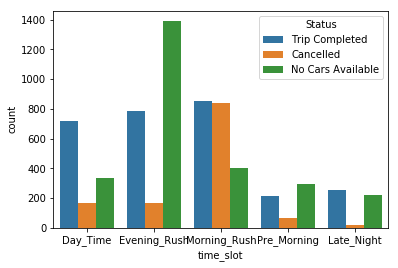

In [28]:
# plot time slot w.r.t. status and identify the most critical problems before Uber
sns.countplot(x = "time_slot", hue = "Status", data = df)

In [29]:
plt.show()

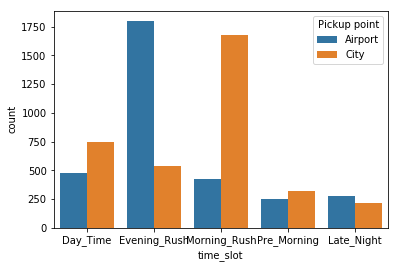

In [30]:
# plot time slot w.r.t. pickuppint and identify the most critical problems before Uber
sns.countplot(x = "time_slot", hue = "Pickup point", data = df)

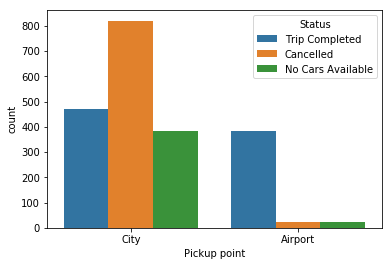

In [31]:
# as you can see in the above plot the higest number of cancellations are in the "Morning Rush" time slot
df_morning_rush = df[df.time_slot == "Morning_Rush"]
sns.countplot(x = "Pickup point", hue = "Status", data = df_morning_rush)

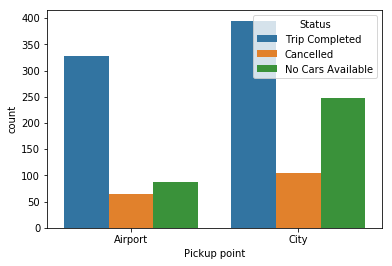

In [32]:
# as you can see in the above plot the higest number of cancellations are in the "Day time" time slot
df_day_time = df[df.time_slot == "Day_Time"]
sns.countplot(x = "Pickup point", hue = "Status", data = df_day_time)

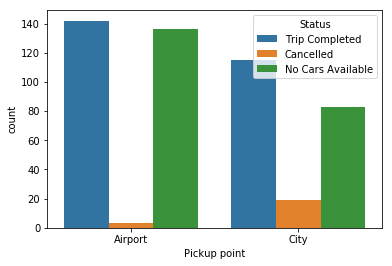

In [33]:
# as you can see in the above plot the higest number of cancellations are in the "Late_Night" time slot
df_late_night = df[df.time_slot == "Late_Night"]
sns.countplot(x = "Pickup point", hue = "Status", data = df_late_night)

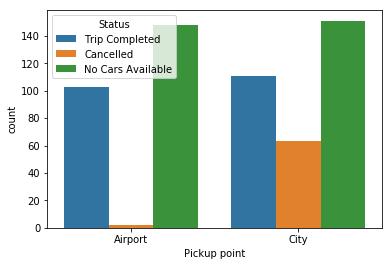

In [34]:
# as you can see in the above plot the higest number of cancellations are in the "Pre_Morning" time slot
df_Pre_Morning = df[df.time_slot == "Pre_Morning"]
sns.countplot(x = "Pickup point", hue = "Status", data = df_Pre_Morning)

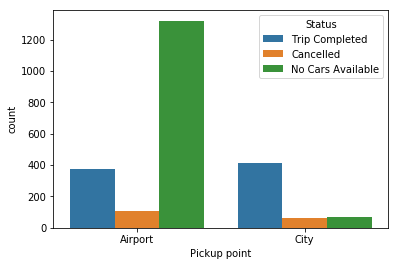

In [35]:
# let's look at the supply and demand in evening rush hour
df_evening_rush = df[df.time_slot == "Evening_Rush"]
sns.countplot(x = "Pickup point", hue = "Status", data = df_evening_rush)

In [36]:
# severity of problem by location and their count (cancellation of cab as per the pickup location @Morning Rush)
df_airport_cancelled  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "Airport") & (df_morning_rush["Status"] == "Cancelled")]
len(df_airport_cancelled.index)

23

In [37]:
df_city_cancelled = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "City") & (df_morning_rush["Status"] == "Cancelled")]
len(df_city_cancelled.index)

820

In [38]:
# let's look at the supply and demand in morning rush hour in the city
df_city_completed_morning_rush = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "City") & (df_morning_rush["Status"] == "Trip Completed")]
len(df_city_completed_morning_rush.index)

472

In [39]:
df_city_morning_rush  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "City")]
len(df_city_morning_rush.index)

1677

In [40]:
# let's look at the supply and demand in morning rush hour at the airport
df_airport_completed_morning_rush = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "Airport") & (df_morning_rush["Status"] == "Trip Completed")]
len(df_airport_completed_morning_rush.index)

382

In [41]:
df_airport_morning_rush  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "Airport")]
len(df_airport_morning_rush.index)

426

*Line charts for req_hour

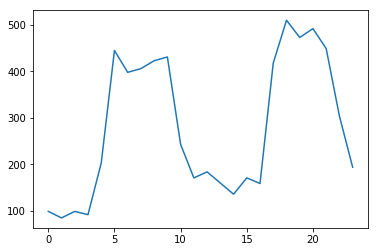

In [42]:
df['req_hour'].value_counts().sort_index().plot.line()

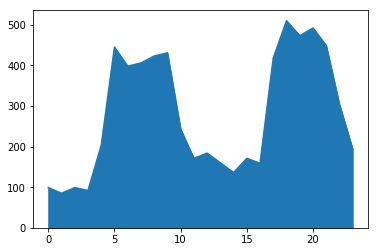

In [43]:
df['req_hour'].value_counts().sort_index().plot.area()

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


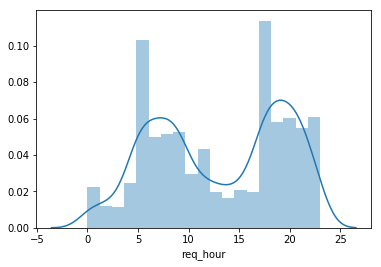

In [44]:
#Let's now analyse how the status varies across continuous variables. :-Plotting univariate distributions
sns.distplot(df['req_hour'])
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


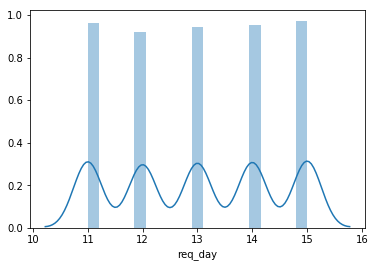

In [45]:
#Plotting univariate distributions for req_day
sns.distplot(df['req_day'])
plt.show()